In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\HP\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [8]:
 df = pd.read_csv('bike_rent (1).csv')

In [9]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2011,springer,2011,1,0,No,6,No work,Clear,0.24,0.2879,0.81,0,3,13,16
1,2,01-01-2011,springer,2011,1,1,No,6,No work,Clear,0.22,0.2727,0.8,0,8,32,40
2,3,01-01-2011,springer,2011,1,2,No,6,No work,Clear,0.22,0.2727,?,0,5,27,32
3,4,01-01-2011,springer,2011,1,3,No,6,No work,Clear,0.24,0.2879,0.75,0,3,10,13
4,5,01-01-2011,springer,2011,1,4,No,6,No work,Clear,0.24,0.2879,0.75,0,0,1,1


In [10]:
df.shape

(17379, 17)

In [11]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

# Data Quality checks

In [12]:
df.dtypes

instant        int64
dteday        object
season        object
yr            object
mnth          object
hr             int64
holiday       object
weekday        int64
workingday    object
weathersit    object
temp          object
atemp         object
hum           object
windspeed     object
casual        object
registered    object
cnt            int64
dtype: object

In [13]:
df = df.replace("?",np.NaN)
for i in df.columns:
    print('Columns:',i)
    print('Number of nulls:',df[i].isnull().sum())

Columns: instant
Number of nulls: 0
Columns: dteday
Number of nulls: 0
Columns: season
Number of nulls: 6
Columns: yr
Number of nulls: 1
Columns: mnth
Number of nulls: 1
Columns: hr
Number of nulls: 0
Columns: holiday
Number of nulls: 1
Columns: weekday
Number of nulls: 0
Columns: workingday
Number of nulls: 5
Columns: weathersit
Number of nulls: 4
Columns: temp
Number of nulls: 11
Columns: atemp
Number of nulls: 6
Columns: hum
Number of nulls: 6
Columns: windspeed
Number of nulls: 5
Columns: casual
Number of nulls: 1
Columns: registered
Number of nulls: 1
Columns: cnt
Number of nulls: 0


In [14]:
df.nunique()

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

In [15]:
#df.drop('instant',axis =1,inplace = True)


In [16]:
df['yr'] = df['yr'].fillna(df['yr'].mode()[0])
df['temp'] = df['temp'].fillna(df['temp'].mode()[0])
df['season'] = df['season'].fillna(df['season'].mode()[0])

In [17]:
df['mnth'] = df['mnth'].fillna(df['mnth'].mode()[0])
df['workingday'] = df['workingday'].fillna(df['workingday'].mode()[0])
df['weathersit'] = df['weathersit'].fillna(df['weathersit'].mode()[0])
df['atemp'] = df['atemp'].fillna(df['atemp'].mode()[0])
df['hum'] = df['hum'].fillna(df['hum'].mode()[0])
df['windspeed'] = df['windspeed'].fillna(df['windspeed'].mode()[0])

In [18]:
df['registered'] = df['registered'].fillna(df['registered'].mode()[0])

In [19]:
df.describe()

,instant,hr,weekday,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000
mean,8690.0000,11.546752,3.003683,189.463088
std,5017.0295,6.914405,2.005771,181.387599
min,1.0000,0.000000,0.000000,1.000000
25%,4345.5000,6.000000,1.000000,40.000000
50%,8690.0000,12.000000,3.000000,142.000000
75%,13034.5000,18.000000,5.000000,281.000000
max,17379.0000,23.000000,6.000000,977.000000


# Data Visualization

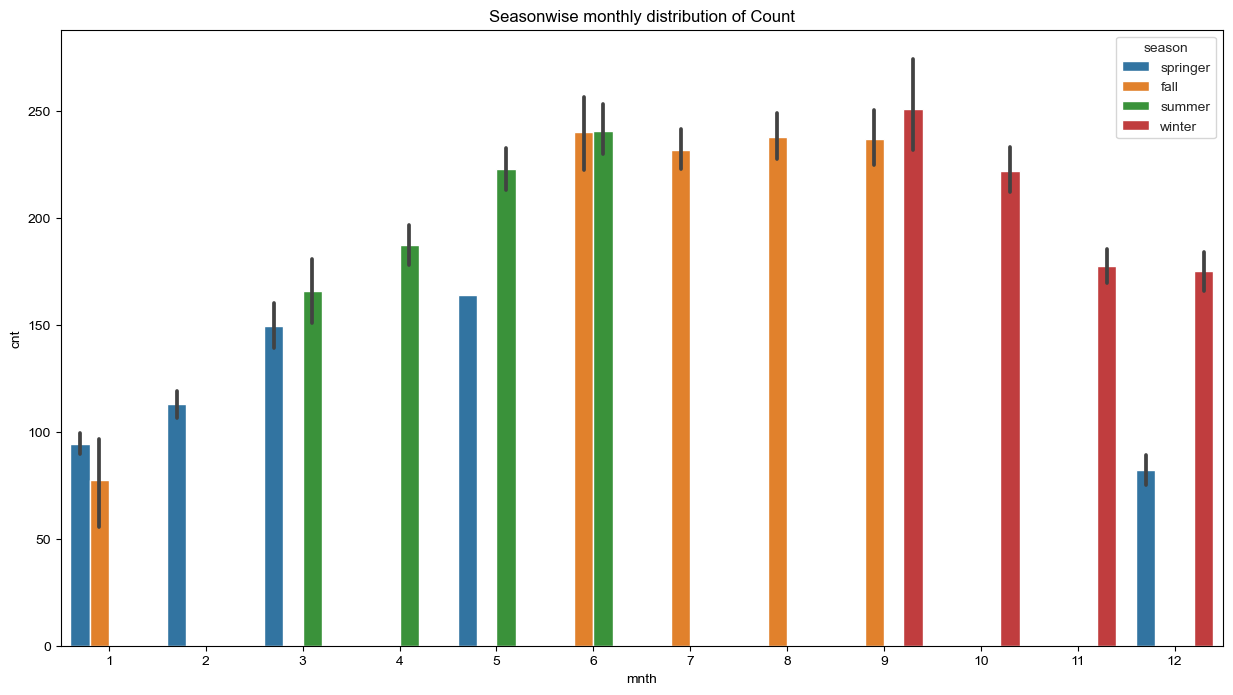

In [20]:
fig,ax = plt.subplots(figsize=(15,8))
sns.set_style('white')
#Bar plot for seasonwise monthly distribution of count
sns.barplot(x= 'mnth',y = 'cnt',data = df[['mnth','cnt','season']],hue = 'season',ax = ax)
ax.set_title('Seasonwise monthly distribution of Count')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

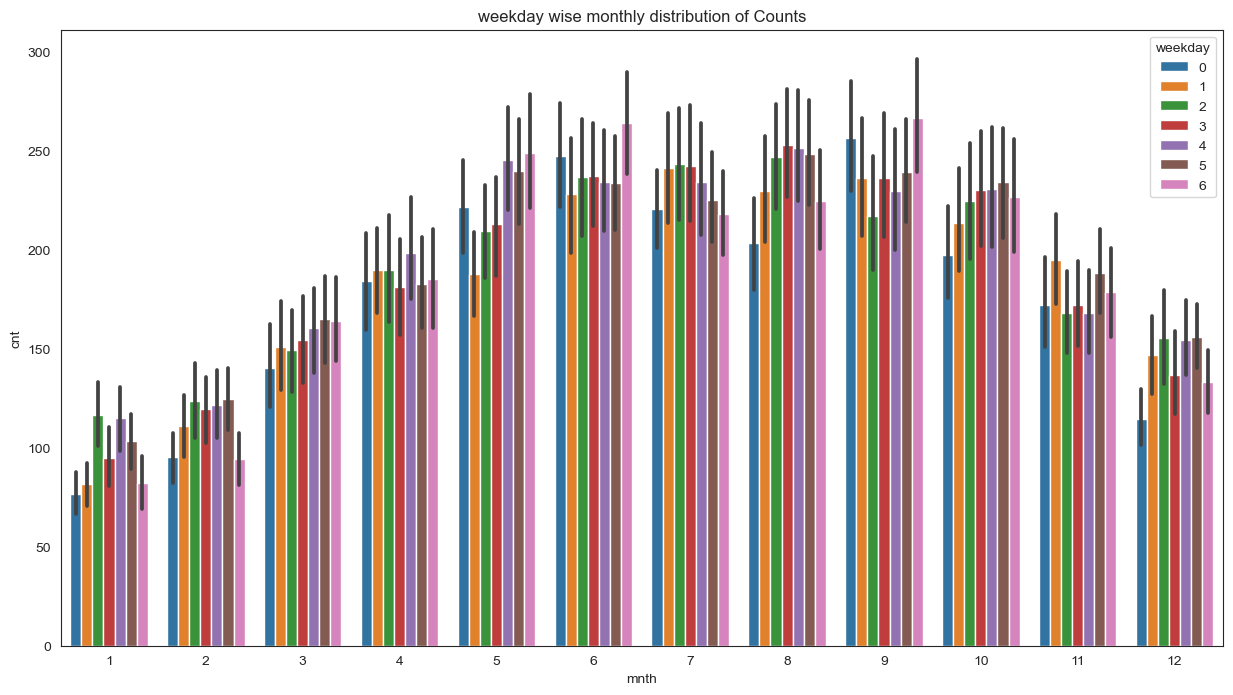

In [21]:
#Bar plot for weekday wise monthly distribution of counts
fig,ax1 = plt.subplots(figsize = (15,8))
sns.barplot(x = 'mnth',y = 'cnt',data = df[['mnth','cnt','weekday']],hue = 'weekday',ax = ax1)
ax1.set_title('weekday wise monthly distribution of Counts')
plt.show

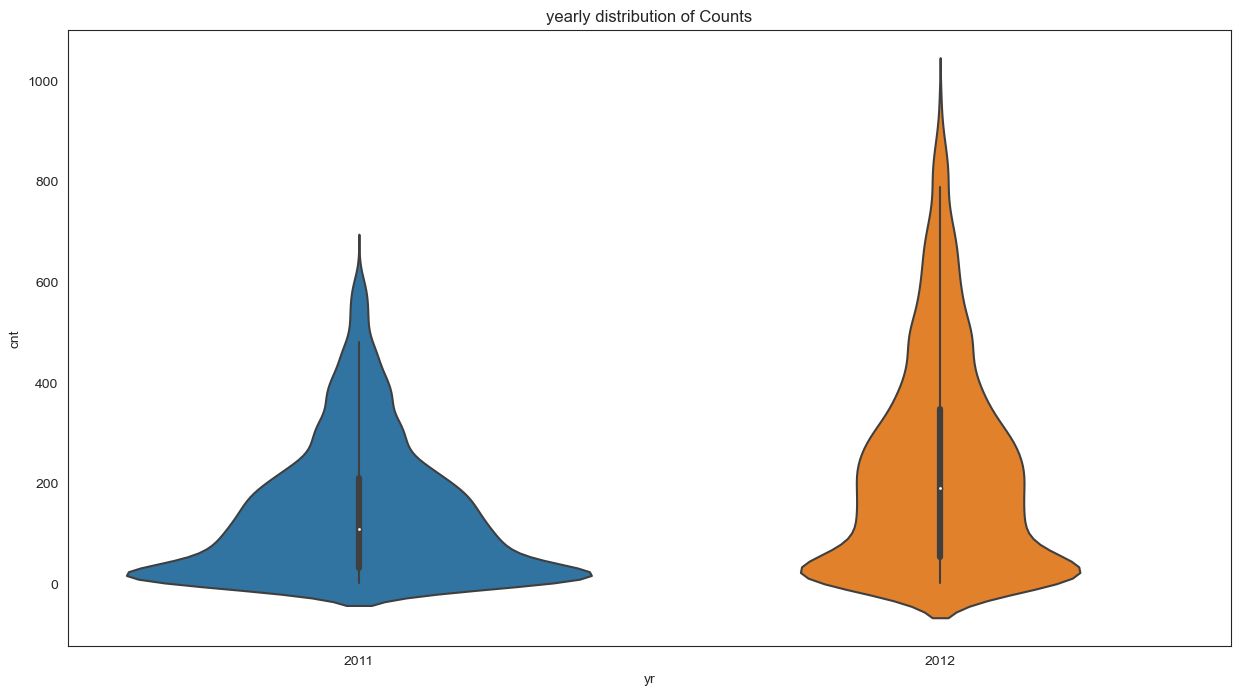

In [22]:
fig,ax= plt.subplots(figsize = (15,8))
#vilion plot for yearly distribution of counts
sns.violinplot(x = 'yr',y = 'cnt',data = df[['yr','cnt']])
ax.set_title('yearly distribution of Counts')
plt.show()

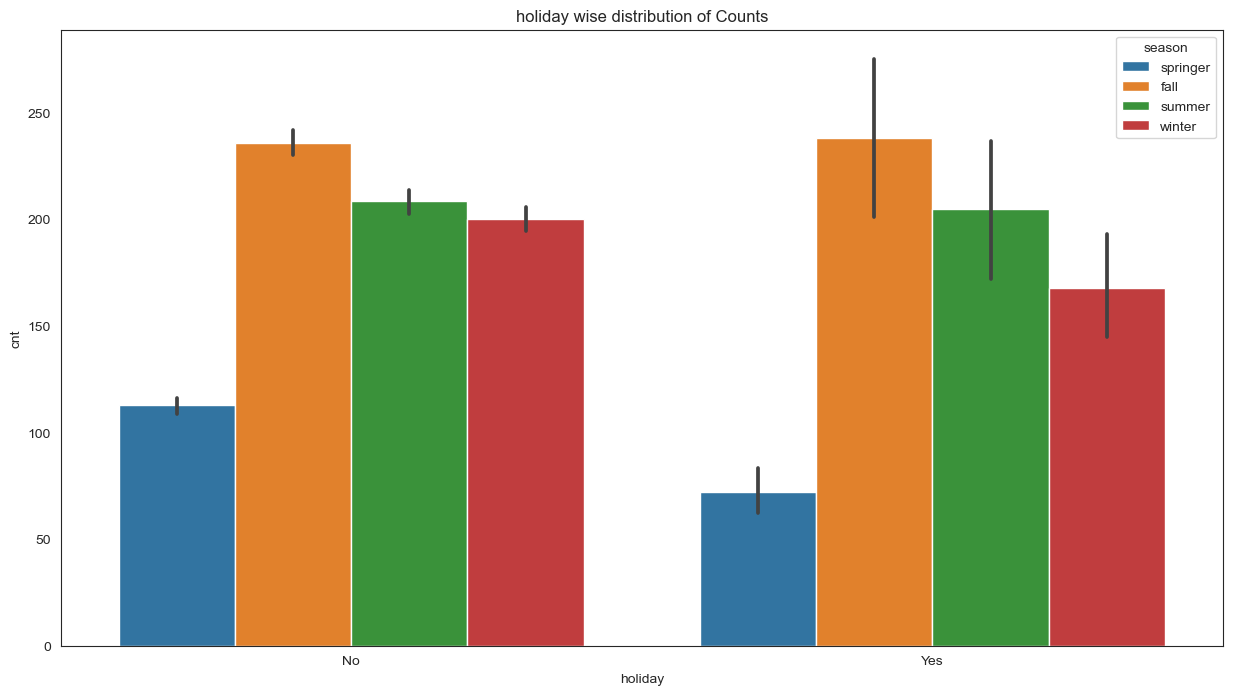

In [23]:
fig,ax = plt.subplots(figsize = (15,8))
#Bar plot for Holiday distribution of counts
sns.barplot(data = df,x = 'holiday',y = 'cnt',hue = 'season')
ax.set_title('holiday wise distribution of Counts')
plt.show()

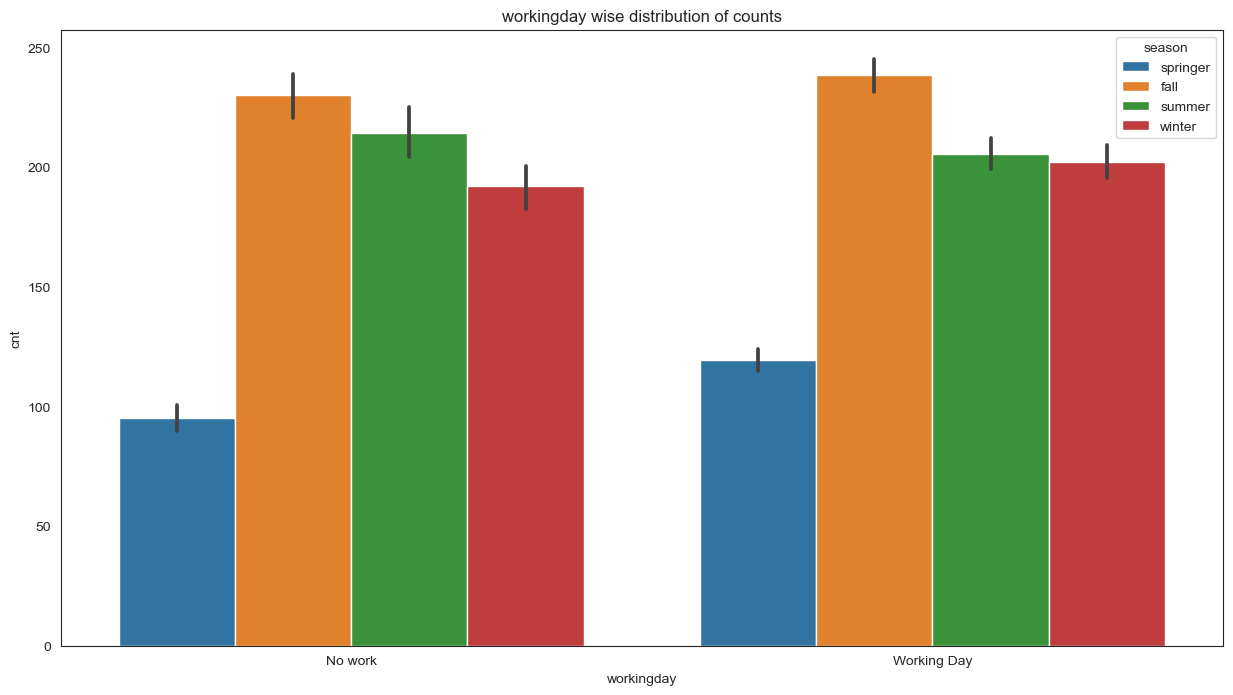

In [24]:
fig,ax = plt.subplots(figsize=(15,8))
#barplot for workingday distribution of counts
sns.barplot(data = df,x = 'workingday',y = 'cnt',hue = 'season')
ax.set_title('workingday wise distribution of counts')
plt.show()

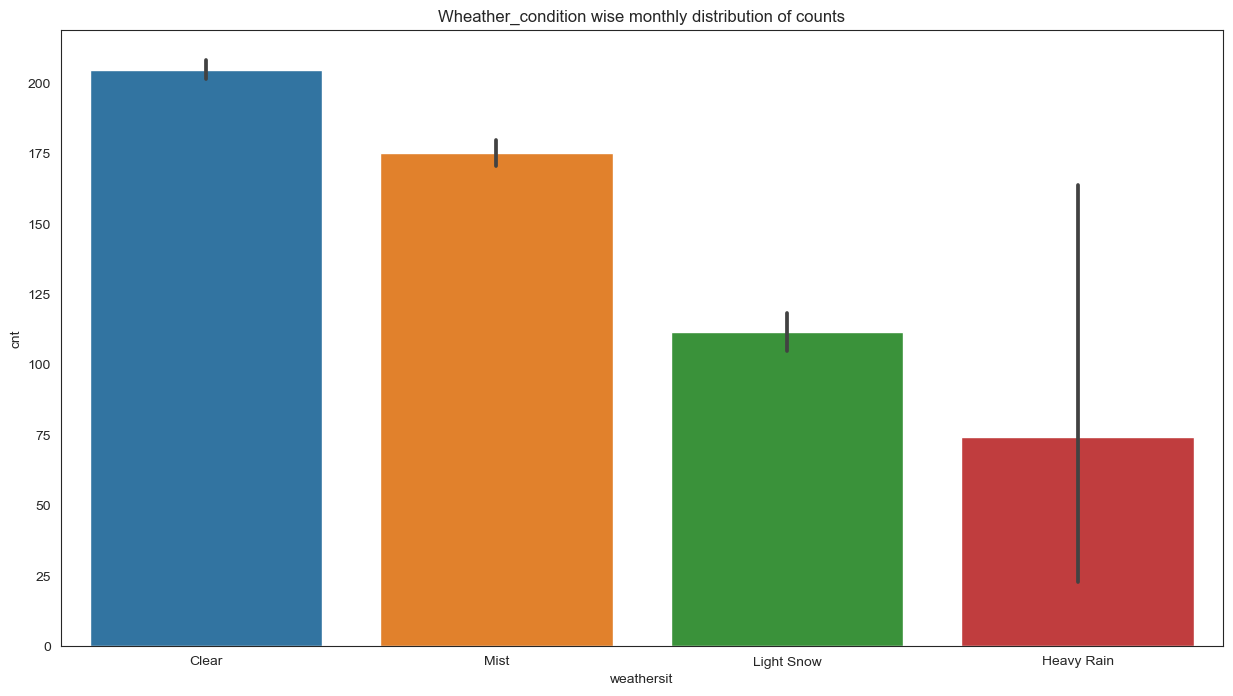

In [25]:
fig,ax1 = plt.subplots(figsize=(15,8))
#barplots for wether_condition distribution of counts
sns.barplot(x = 'weathersit',y = 'cnt',data = df[['mnth','cnt','weathersit']],ax = ax1)
ax1.set_title('Wheather_condition wise monthly distribution of counts')
plt.show()

# Removing Outliers

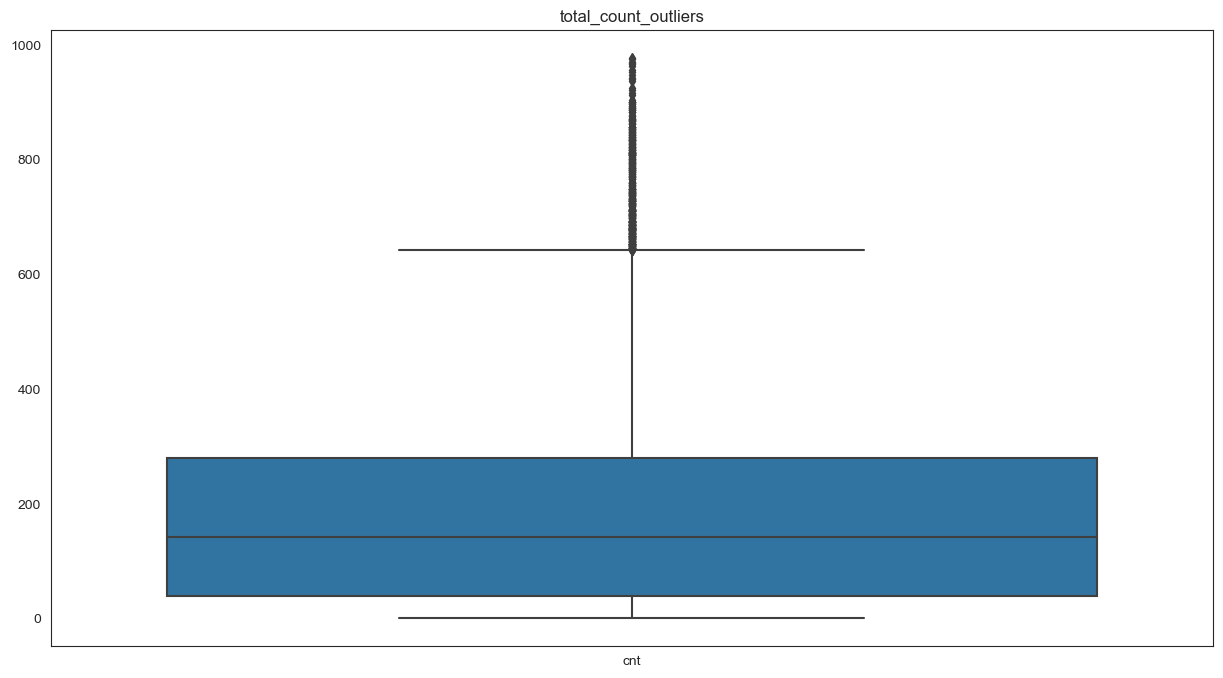

In [26]:
fig,ax=plt.subplots(figsize=(15,8))
#Boxplot for total_count Outliers
sns.boxplot(data = df[['cnt']])
ax.set_title('total_count_outliers')
plt.show()

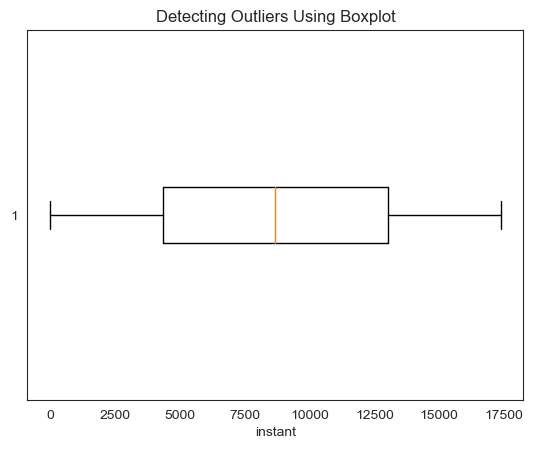

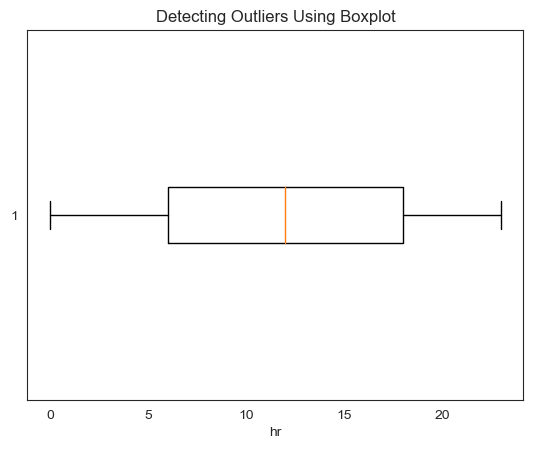

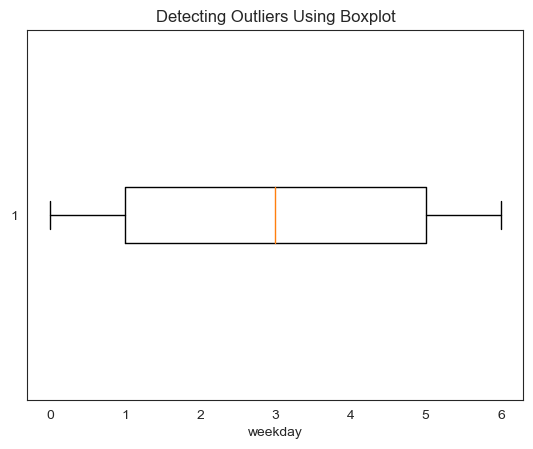

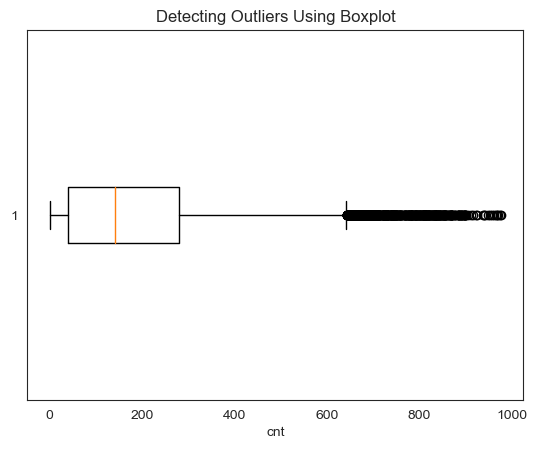

In [27]:
for i in dict(df.dtypes):
    if dict(df.dtypes)[i] == 'int64' or dict(df.dtypes)[i] == 'float64':
     plt.boxplot(df[i],vert = False)
     plt.title('Detecting Outliers Using Boxplot')
     plt.xlabel(i)
     plt.show()

In [28]:
import numpy as np
outliers = []
def detect_outliers_zscore(data):
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score)>thres):
            outliers.append(i)
    return outliers
        

In [29]:
for i in dict(df.dtypes):
    outliers = []
    if dict(df.dtypes)[i] == 'int64' or dict(df.dtypes)[i] =='float64':
        sample_outliers = detect_outliers_zscore(df[i])
        print('Column:',i)
        print('Outliers from Z-score Method:',sample_outliers)
        if len(sample_outliers)>0:
            median = np.median(df[i])
            for j in sample_outliers:
                df[i] = np.where(df[i]==j,median,df[i])
            print('Ater Treatment:')
            outliers = []
            sample_outliers = detect_outliers_zscore(df[i])
            print('Outliers from Z-score method:',sample_outliers)


Column: instant
Outliers from Z-score Method: []
Column: hr
Outliers from Z-score Method: []
Column: weekday
Outliers from Z-score Method: []
Column: cnt
Outliers from Z-score Method: [734, 782, 749, 746, 801, 750, 801, 779, 810, 801, 957, 830, 757, 800, 744, 759, 822, 744, 738, 781, 775, 748, 776, 819, 743, 813, 769, 770, 779, 873, 846, 852, 868, 745, 812, 785, 785, 798, 752, 781, 839, 796, 827, 785, 834, 822, 850, 790, 782, 869, 813, 793, 800, 831, 857, 744, 867, 823, 823, 811, 795, 833, 791, 900, 824, 843, 804, 747, 849, 872, 872, 819, 830, 814, 795, 825, 835, 755, 794, 770, 772, 771, 777, 738, 847, 741, 743, 869, 877, 788, 913, 891, 738, 751, 827, 812, 760, 820, 857, 837, 891, 739, 865, 767, 741, 858, 843, 868, 814, 737, 858, 862, 810, 811, 818, 812, 812, 854, 851, 848, 897, 832, 791, 893, 815, 878, 740, 783, 820, 941, 744, 812, 736, 845, 834, 864, 818, 808, 870, 812, 754, 844, 853, 856, 839, 863, 839, 808, 835, 772, 792, 757, 871, 968, 750, 970, 877, 770, 925, 977, 758, 884, 852, 

<Axes: xlabel='cnt'>

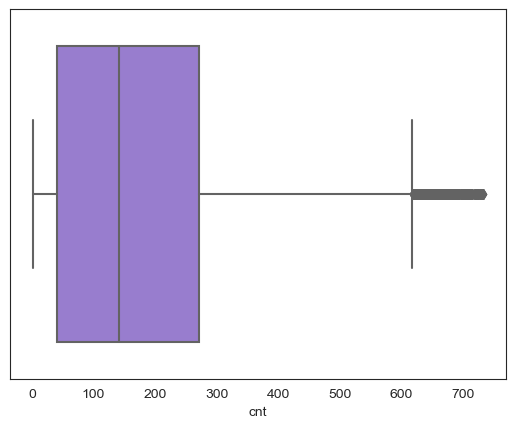

In [30]:
sns.boxplot(x = 'cnt',data =df,color = 'mediumpurple')

In [31]:
mapping = {}
for i in dict(df.dtypes):
    if dict(df.dtypes)[i] =="O":
     mapping[i] = dict(zip(df[i].unique(),range(len(df[i].unique()))))
     df[i] = df[i].map(lambda x: mapping[i][x])
df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,16.0
1,2,0,0,0,0,1,0,6,0,0,1,1,1,0,1,1,40.0
2,3,0,0,0,0,2,0,6,0,0,1,1,2,0,2,2,32.0
3,4,0,0,0,0,3,0,6,0,0,0,0,3,0,0,3,13.0
4,5,0,0,0,0,4,0,6,0,0,0,0,3,0,3,4,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,730,0,1,11,19,0,1,1,1,13,2,54,8,16,123,119.0
17375,17376,730,0,1,11,20,0,1,1,1,13,2,54,8,1,38,89.0
17376,17377,730,0,1,11,21,0,1,1,0,3,2,54,8,18,93,90.0
17377,17378,730,0,1,11,22,0,1,1,0,13,1,34,7,23,41,61.0


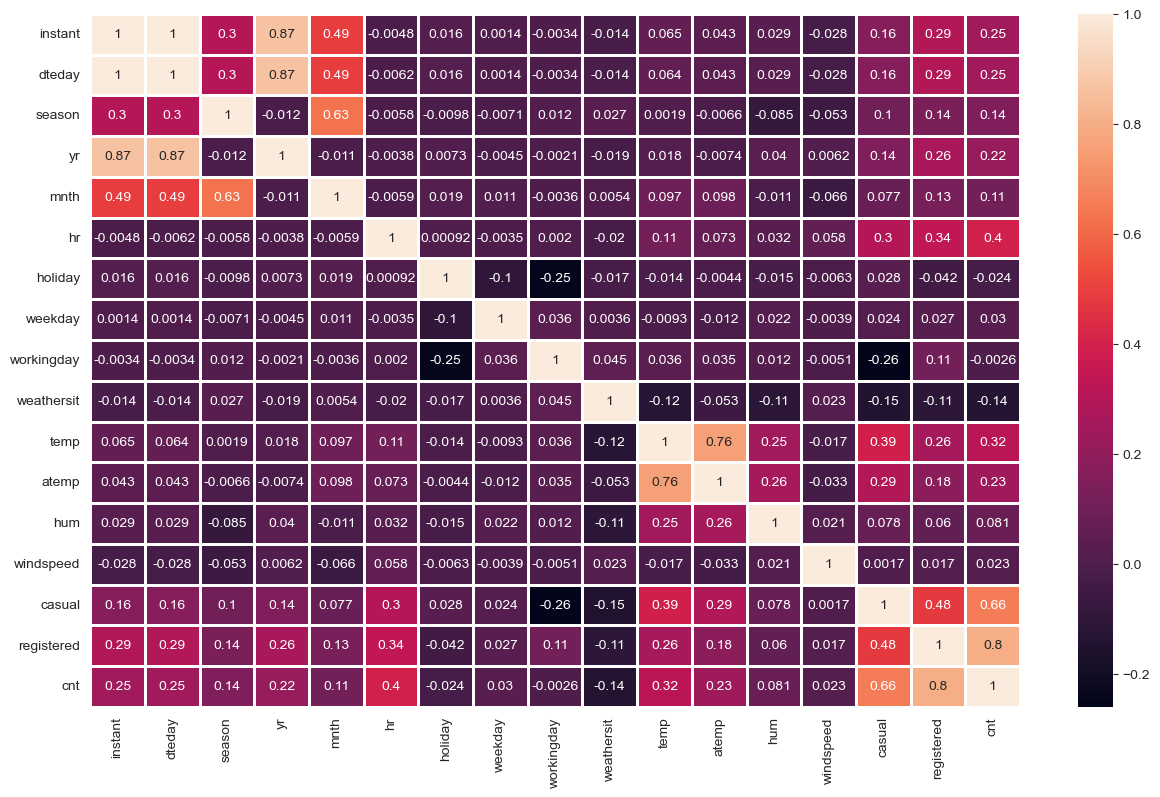

In [32]:
#Feature Selection
plt.figure(figsize = (15,9))
corr = df.corr()
sns.heatmap(data = corr,annot = True,fmt = '.2g',linewidth =1)
plt.show()

In [33]:
#Scaling numeric Columns

In [34]:
from sklearn.preprocessing import MinMaxScaler
def scaling(df):
    scaler = MinMaxScaler()
    num_cols = ['temp','atemp','hum','windspeed']
    df[num_cols] = scaler.fit_transform(df[num_cols])
    return df

# splitting of data

In [35]:
x = df.drop('cnt',axis =1)
y = df['cnt']

In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [90]:
y_train

335       72.0
7035     518.0
8051       3.0
2133     172.0
8485       1.0
         ...  
11284    359.0
11964    142.0
5390     189.0
860      100.0
15795    142.0
Name: cnt, Length: 13903, dtype: float64

In [38]:
x_test.shape

(3476, 16)

# importing models 

In [39]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [40]:
from sklearn.model_selection import GridSearchCV

In [41]:
from sklearn.metrics import precision_score,recall_score,confusion_matrix,classification_report,accuracy_score,f1_score

In [42]:
from sklearn.model_selection import cross_val_score,cross_val_predict

# DECISION TREE

In [43]:
from sklearn.tree import DecisionTreeRegressor
DT_model = DecisionTreeRegressor(min_samples_split = 2,max_leaf_nodes = 10)
DT_model = DT_model.fit(x_train,y_train)
pred = DT_model.predict(x_test)

In [44]:
#model Accuracy
model_score = DT_model.score(x_test,y_test)
model_score*100


79.61399465772803

In [45]:
predict = cross_val_predict(DT_model,x_train,y_train,cv = 3)
predict

array([ 66.90185676, 419.16226658,  19.77994297, ...,  71.95426357,
       132.13464837, 316.63694268])

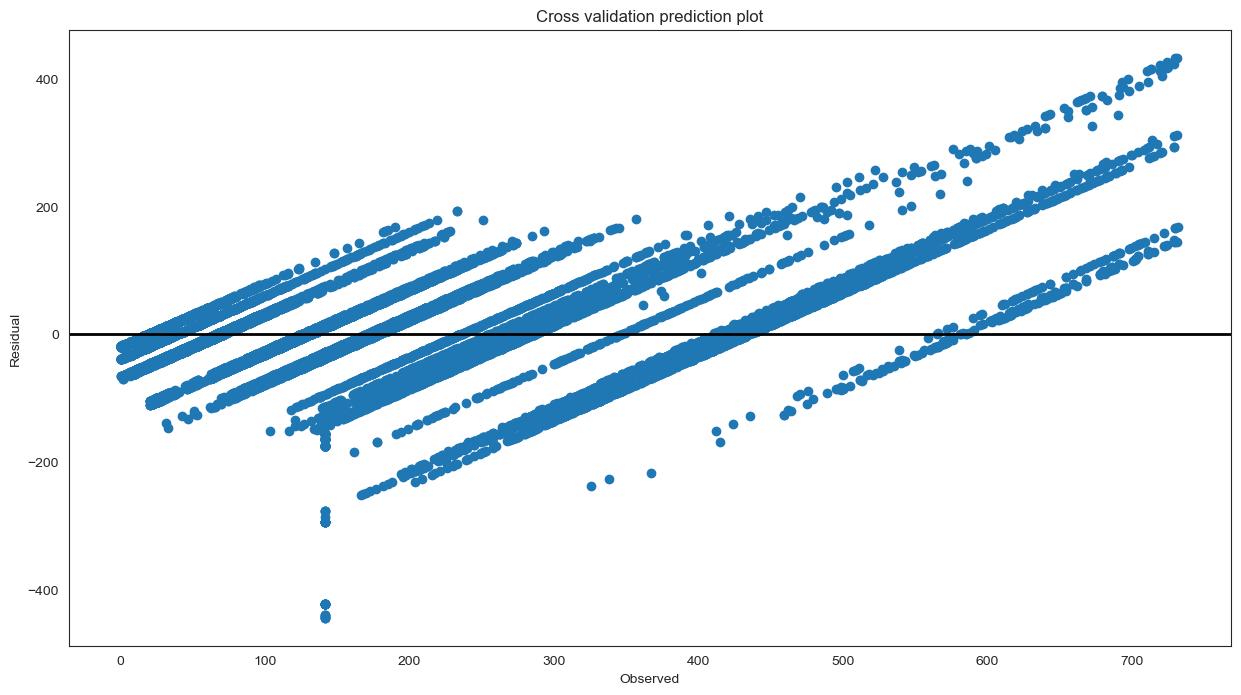

In [46]:
fig,ax=plt.subplots(figsize=(15,8))
ax.scatter(y_train,y_train-predict)
ax.axhline(lw=2,color='black')
ax.set_title('Cross validation prediction plot')
ax.set_xlabel('Observed')
ax.set_ylabel('Residual')
plt.show()

In [47]:
#R-Squared scores
r2_scores = cross_val_score(DT_model,x_train,y_train,cv = 3)
print('R-squared scores:',np.average(r2_scores))

R-squared scores: 0.8004357755629724


In [48]:
DT_pred = DT_model.predict(x_test)
DT_pred

array([362.80678314,  71.656639  ,  21.89716414, ...,  71.656639  ,
       255.49840764, 235.2661597 ])

In [49]:
import math
from sklearn import preprocessing,metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [50]:
#Root mean squared error
rmse = math.sqrt(metrics.mean_squared_error(y_test,DT_pred))
#Mean absolute error
mae = metrics.mean_absolute_error(y_test,DT_pred)
print('Root mean square error :',rmse)
print('Mean absolute error:',mae)

Root mean square error : 73.117664101142
Mean absolute error: 49.19409439897581


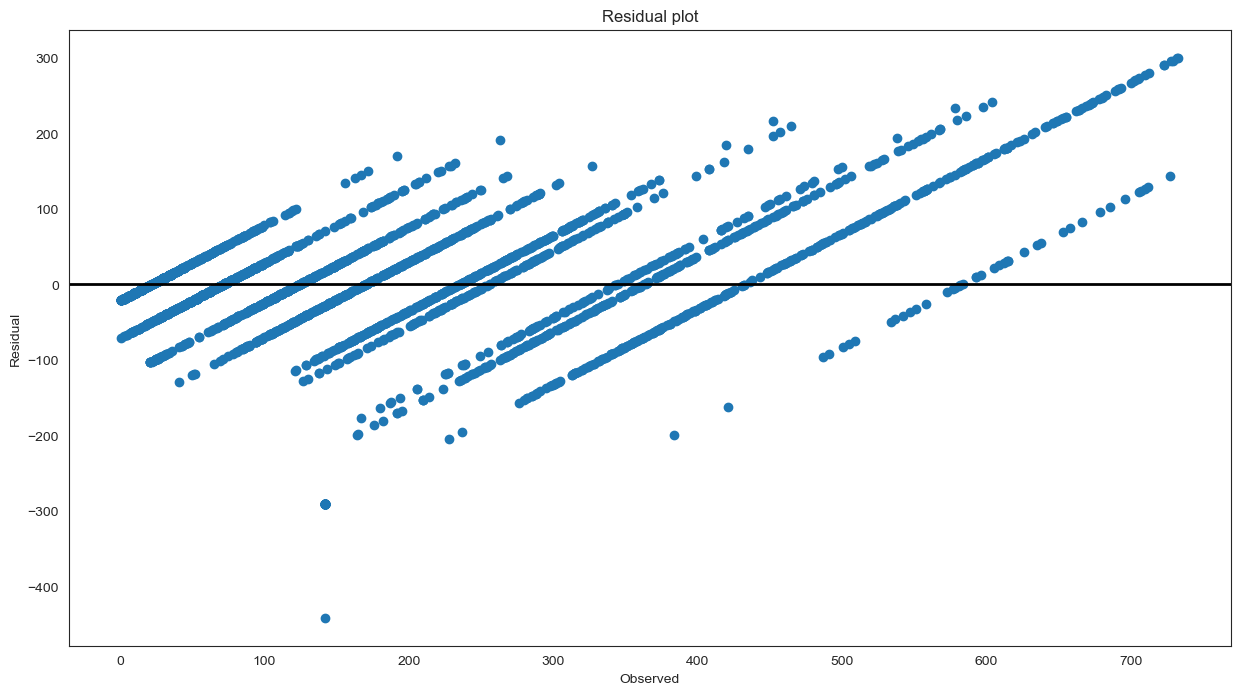

In [51]:
#Residual Scatter Plot
residual = y_test-DT_pred
fig, ax = plt.subplots(figsize=(15,8))
ax.scatter(y_test, residual)
ax.axhline(lw=2,color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Residual')
ax.set_title('Residual plot')
plt.show()

# RANDOM FOREST

In [52]:
RF_model = RandomForestRegressor()
RF_model = RF_model.fit(x_train,y_train)
pred = RF_model.predict(x_test)


In [53]:
#model accuracy
model_score = RF_model.score(x_test,y_test)
model_score*100

91.38720506409355

In [54]:
predict = cross_val_predict(RF_model,x_train,y_train,cv = 3)
predict

array([ 79.07, 524.06,   3.  , ..., 149.77, 116.06, 373.82])

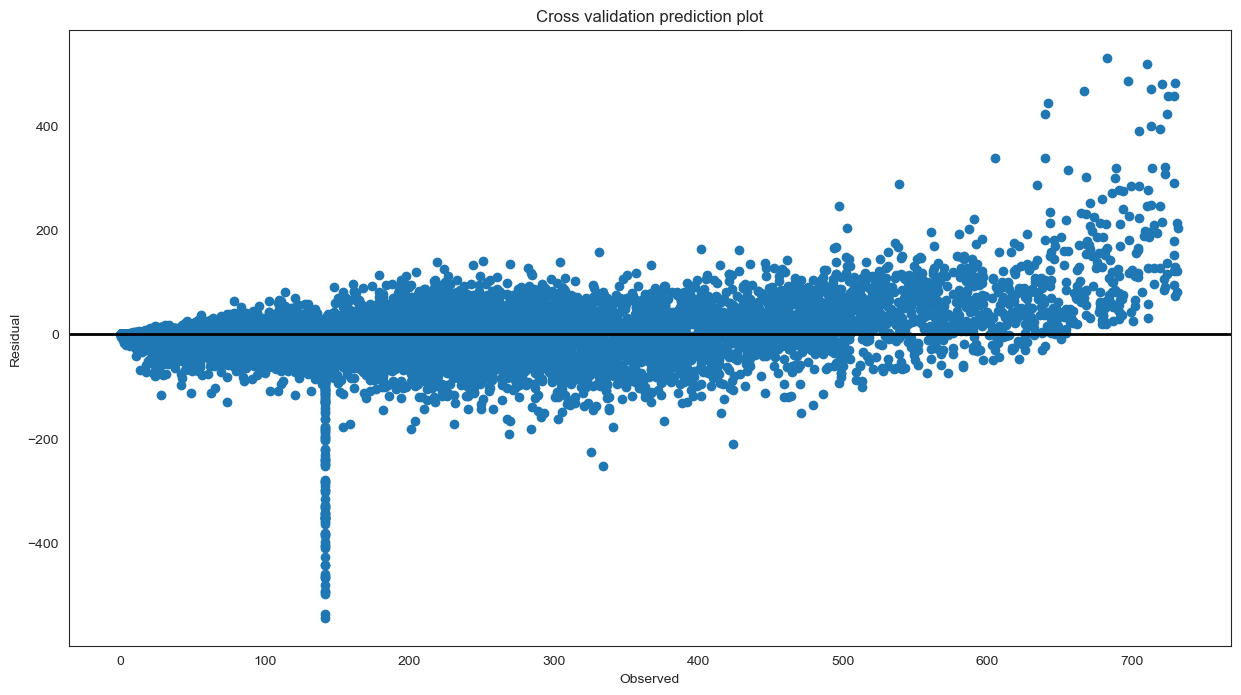

In [55]:
fig,ax=plt.subplots(figsize=(15,8))
ax.scatter(y_train,y_train-predict)
ax.axhline(lw=2,color='black')
ax.set_title('Cross validation prediction plot')
ax.set_xlabel('Observed')
ax.set_ylabel('Residual')
plt.show()

In [56]:
#R-Squared scores
r2_scores = cross_val_score(RF_model,x_train,y_train,cv = 3)
print('R-squared scores:',np.average(r2_scores))

R-squared scores: 0.9118715869279205


In [57]:
RF_pred = RF_model.predict(x_test)
RF_pred

array([443.7 ,  67.99,   4.  , ...,  69.1 , 261.52, 286.18])

In [58]:
#Root mean squared error
rmse = math.sqrt(metrics.mean_squared_error(y_test,RF_pred))
#Mean absolute error
mae = metrics.mean_absolute_error(y_test,RF_pred)
print('Root mean square error :',rmse)
print('Mean absolute error:',mae)

Root mean square error : 47.525675153757504
Mean absolute error: 24.021930379746834


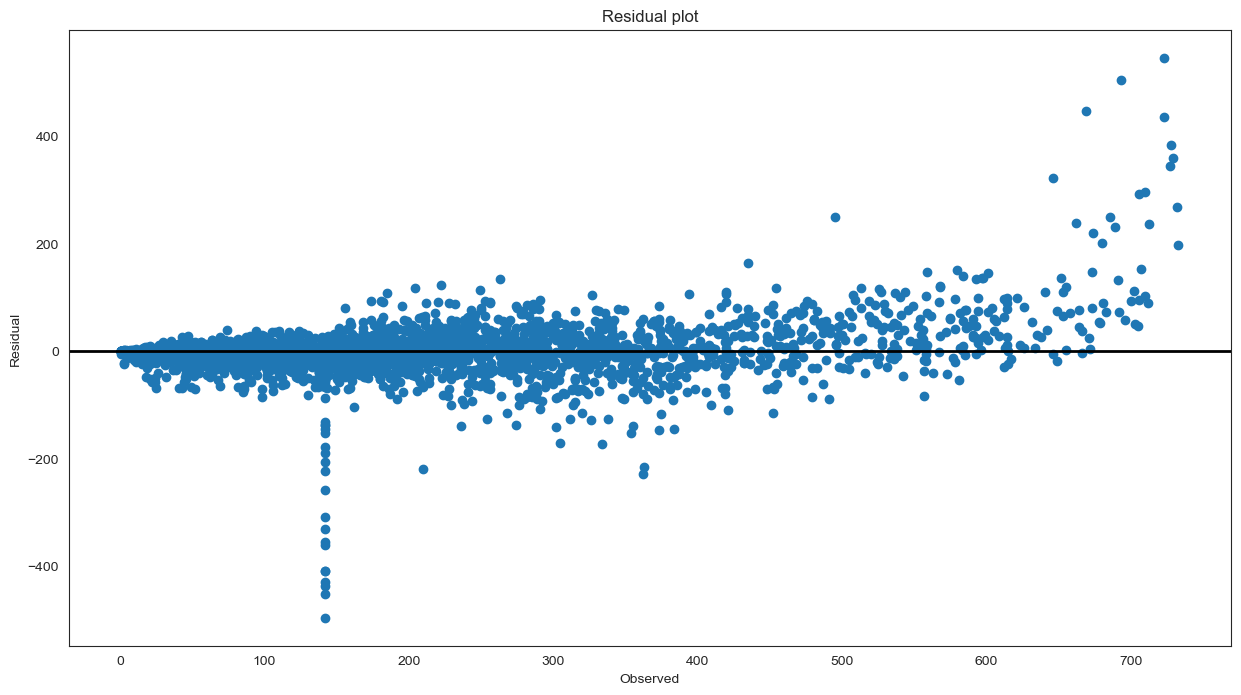

In [59]:
#Residual Scatter Plot
residual = y_test-RF_pred
fig, ax = plt.subplots(figsize=(15,8))
ax.scatter(y_test, residual)
ax.axhline(lw=2,color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Residual')
ax.set_title('Residual plot')
plt.show()

# XGBOOST

In [60]:
XG_model = XGBRegressor()
XG_model = XG_model.fit(x_train,y_train)
pred = XG_model.predict(x_test)

In [61]:
model_score = XG_model.score(x_test,y_test)
model_score*100

91.21413449097919

In [62]:
predict = cross_val_predict(XG_model,x_train,y_train,cv = 3)
predict

array([ 69.60028  , 518.7587   ,   1.4220854, ..., 144.81131  ,
       126.348076 , 312.68787  ], dtype=float32)

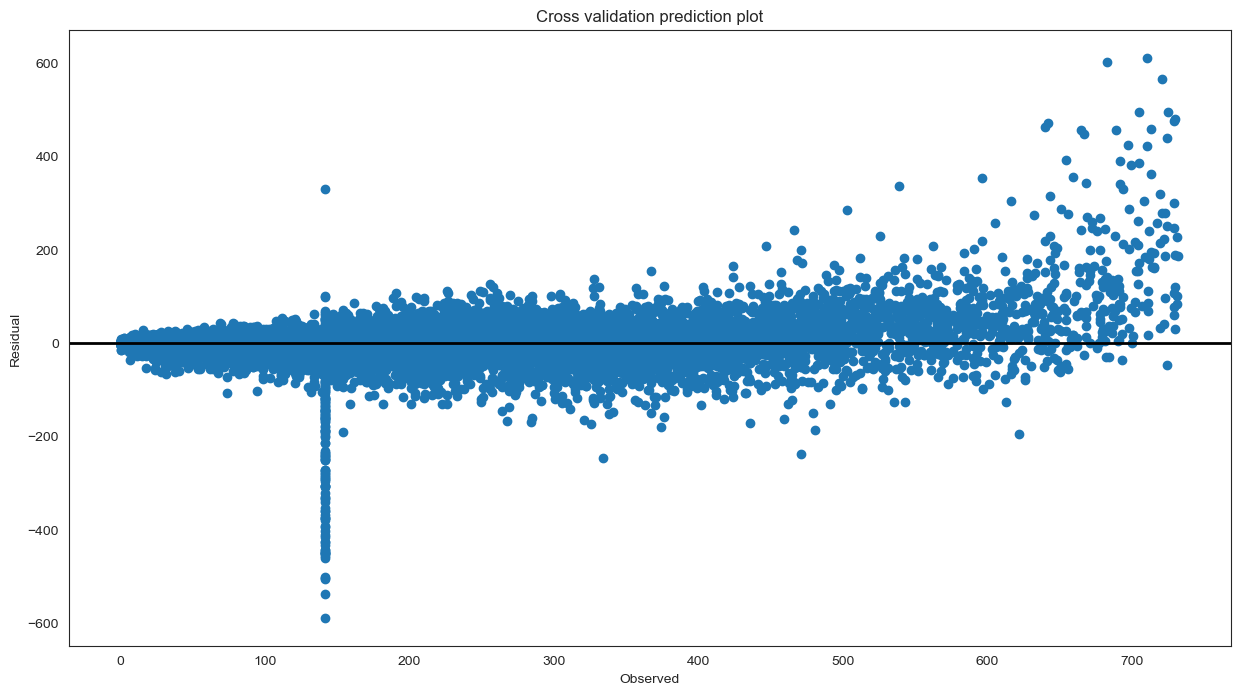

In [63]:
# Cross validation prediction plot
fig,ax=plt.subplots(figsize=(15,8))
ax.scatter(y_train,y_train-predict)
ax.axhline(lw=2,color='black')
ax.set_title('Cross validation prediction plot')
ax.set_xlabel('Observed')
ax.set_ylabel('Residual')
plt.show()

In [64]:
#R-Squared scores
r2_scores = cross_val_score(XG_model,x_train,y_train,cv = 3)
print('R-squared scores:',np.average(r2_scores))

R-squared scores: 0.9135936229576886


In [65]:
XG_pred = XG_model.predict(x_test)
XG_pred

array([414.4311  ,  56.205723,   9.546756, ...,  66.34245 , 244.96422 ,
       298.0977  ], dtype=float32)

In [66]:
import math
from sklearn import preprocessing,metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [67]:
#Root mean squared error
rmse = math.sqrt(metrics.mean_squared_error(y_test,XG_pred))
#Mean absolute error
mae = metrics.mean_absolute_error(y_test,XG_pred)
print('Root mean square error :',rmse)
print('Mean absolute error:',mae)

Root mean square error : 48.0008045940357
Mean absolute error: 24.072395333770547


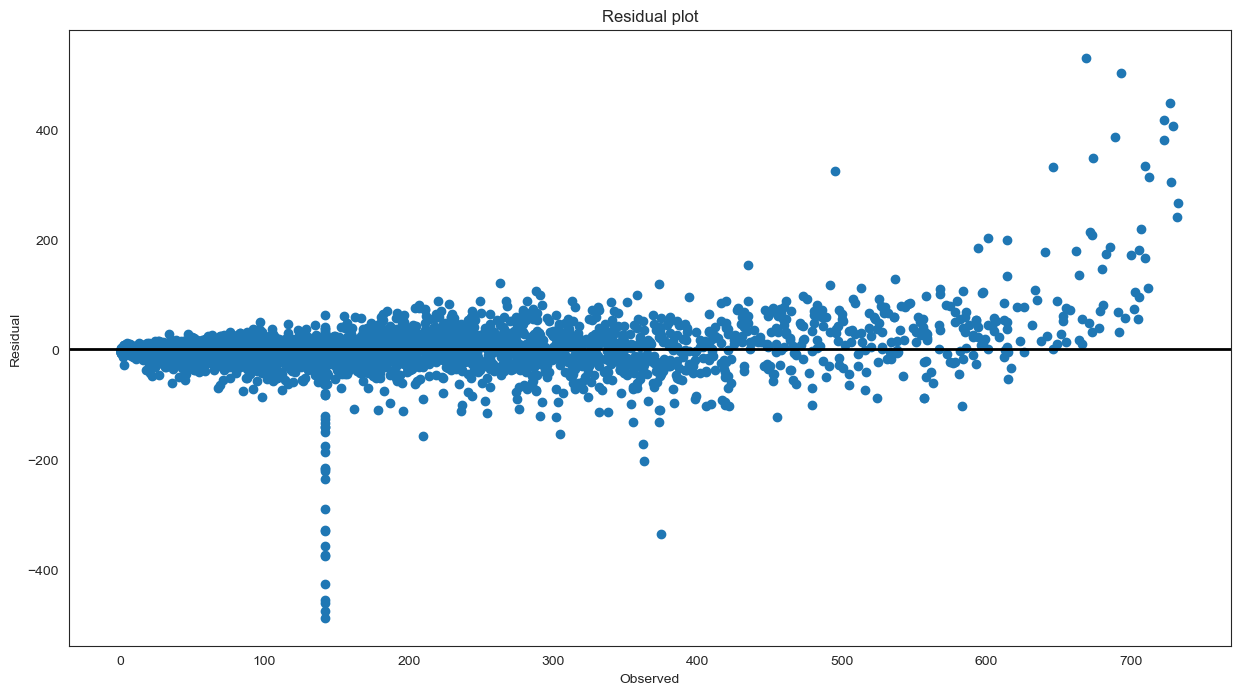

In [68]:
#Residual Scatter Plot
residual = y_test-XG_pred
fig, ax = plt.subplots(figsize=(15,8))
ax.scatter(y_test, residual)
ax.axhline(lw=2,color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Residual')
ax.set_title('Residual plot')
plt.show()

# Hypertuning of XGBRegressor

In [69]:
params = {'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3, 0.5], 'n_estimators': [10,50,100,250],}
xgbR = XGBRegressor()
optimize_model = GridSearchCV(estimator=xgbR, param_grid=params, scoring='neg_mean_squared_error', verbose=1)
optimize_model.fit(x, y)
print("Best parameters: ", optimize_model.best_params_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters:  {'learning_rate': 0.2, 'n_estimators': 250}


In [70]:
model = XGBRegressor(learning_rate =  0.2, n_estimators =  250)
model = model.fit(x_train,y_train)
pred = model.predict(x_test)

In [71]:
model_score = model.score(x_test,y_test)
model_score*100

91.44713096168367

# Predictive model

In [93]:
input_data = (1,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0)

In [94]:
#changing the array input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

In [95]:
#reshape the array as we are predicting for onr instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

In [96]:
predictions = model.predict(input_data_reshaped)
print(predictions)

[21.64993]


In [79]:
#saving the trained model
import pickle


In [80]:
filename = 'trained_model.sav'
pickle.dump(xgbR,open(filename, "wb"))

In [98]:
#loading the saved model
load_model = pickle.load(open('trained_model.sav','rb'))

In [1]:
input_data = (1,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
predictions =model.predict(input_data_reshaped)
print(predictions)
                                       

NameError: name 'np' is not defined